In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.io import loadmat

from disp import set_font_size

FPS = 2
DT = 1/FPS
NT = 61

COL_START_RSP = 6  # which col of data frame responses start at
ISTART_STIM, ISTOP_STIM = (20, 41)  # time idxs start and end of stim
LOAD_FILE = 'data/simple/neur/pacheco.csv'

In [2]:
df = pd.read_csv(LOAD_FILE)
df

,EXPT_ID,STIM,FLY,NEUROPIL,NEUROPIL_IDX,RESPONSE_TYPE_LABEL,IT_0,IT_1,IT_2,IT_3,...,IT_51,IT_52,IT_53,IT_54,IT_55,IT_56,IT_57,IT_58,IT_59,IT_60
0,0,S,1,sSADC,0,13,-0.033654,0.039349,-0.090484,0.401704,...,1.082081,0.920516,0.633192,0.459923,0.777835,0.852022,0.777709,0.278367,0.074631,0.042462
1,0,P,1,sSADC,0,13,0.617594,0.378234,0.414807,0.080734,...,0.246901,0.488439,0.480255,0.425880,0.650568,0.628899,0.368041,0.032336,0.248447,-0.126652
2,1,S,1,AMMC,1,13,0.336833,0.408993,0.474425,0.213802,...,1.001931,0.897849,0.874968,0.410459,0.555852,0.387268,0.438035,0.307526,0.391527,0.531009
3,1,P,1,AMMC,1,13,0.168264,-0.182815,-0.143902,0.101796,...,0.702984,0.584333,0.336659,0.414276,0.284469,0.080918,0.384536,0.325093,0.335583,0.242322
4,2,S,1,sSADC,0,13,0.261517,0.033362,0.034890,0.212583,...,0.288560,0.482021,0.431282,0.281125,0.085184,-0.035244,0.125191,0.065407,-0.110486,-0.020802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38067,19033,P,47,GNG,3,18,-0.039356,-0.014598,-0.034997,-0.035381,...,0.153143,0.171215,0.112855,0.084740,0.064839,0.034636,0.019822,0.042430,0.048326,0.051901
38068,19034,S,47,sSADC,0,15,0.710741,0.594676,0.427717,0.166460,...,2.247301,1.373531,1.862249,1.769727,1.958070,2.003307,1.319867,1.124926,1.354274,1.268899
38069,19034,P,47,sSADC,0,15,0.662882,0.455962,0.019223,-0.011819,...,1.422577,1.974313,1.708528,1.429057,1.396340,1.190694,0.925789,0.586538,0.335784,0.296388
38070,19035,S,47,PLP,7,12,0.123877,-0.103292,-0.265331,-0.061722,...,0.086945,0.273224,0.522694,0.491431,0.948518,1.173859,1.000480,0.539625,0.273782,-0.010819


In [3]:
expt_ids = np.sort(np.unique(df['EXPT_ID']))

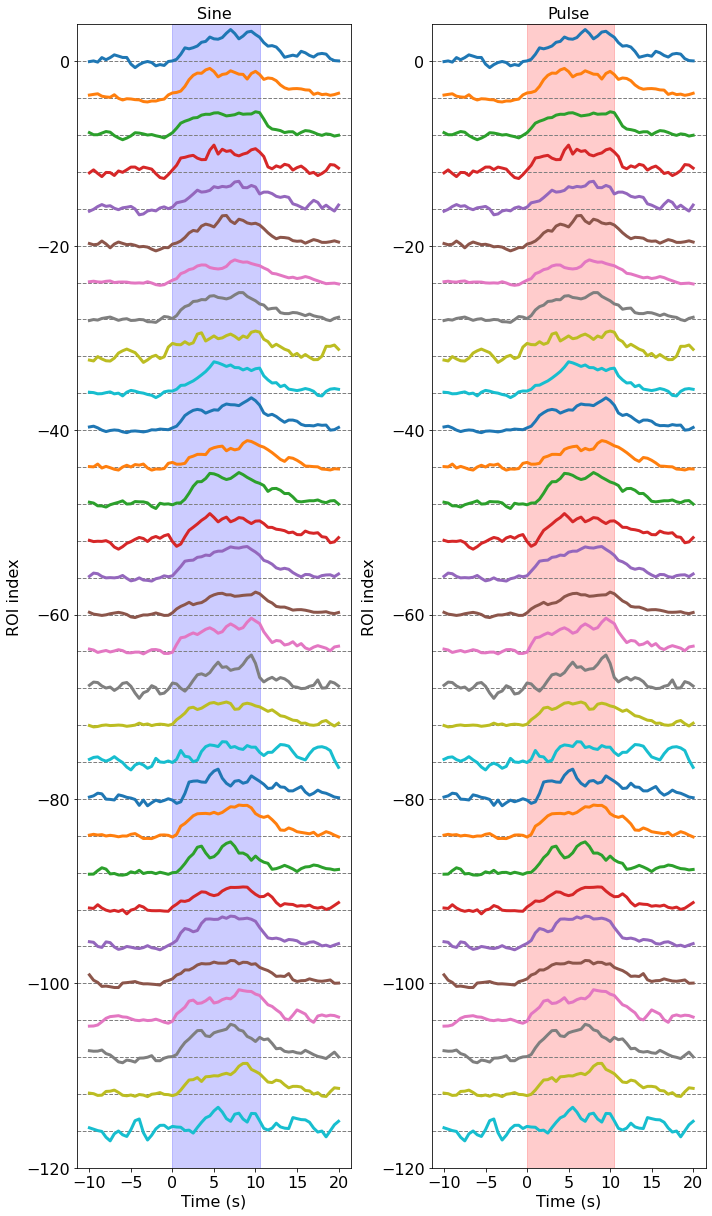

In [4]:
nroi_plot = 30
t = np.arange(NT)*DT - 10

fig, axs = plt.subplots(1, 2, figsize=(10, 17), tight_layout=True)
for cexpt, expt_id in enumerate(expt_ids[:nroi_plot]):
    # sine response
    row_s = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'S')]
    rsp_s = np.array(row_s).flatten()[6:]
    
    axs[0].axhline(-4*cexpt, lw=1, ls='--', c='gray')
    axs[0].plot(t, rsp_s - 4*cexpt, lw=3)
    
    # pulse response
    row_p = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'S')]
    rsp_p = np.array(row_p).flatten()[6:]
    
    axs[1].axhline(-4*cexpt, lw=1, ls='--', c='gray')
    axs[1].plot(t, rsp_p - 4*cexpt, lw=3)
    
for ax, c, stim in zip(axs, ['b', 'r'], ['Sine', 'Pulse']):
    ax.axvspan(t[ISTART_STIM], t[ISTOP_STIM], color=c, alpha=.2)
    ax.set_title(stim)
    ax.set_ylim(-4*nroi_plot, 4)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('ROI index')
    
set_font_size(axs, 16)